

# Project: Investigate a Dataset - [noshowappointments.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This analysis was carried out using a dataset from the health sector. The data collected showing No Show appointment and its factors.


### Dataset Description 

> **Tip**: 
This dataset collects information from 100k medical appointments in Brazil and is focused on  questions relating to patients rate of show up for their appointment. A number of characteristics about the patient are included in each row.
Below is the column description of the data set in its raw for (prior to cleaning)

 #   Column             Dtype  
---  ------          --------------   -----  
 0   PatientId       float64

 1   AppointmentID   int64  
 
 2   Gender          object 
 
 3   ScheduledDay    object 
 
 4   AppointmentDay  object 
 
 5   Age             int64  
 
 6   Neighbourhood   object 
 
 7   Scholarship     int64  
 
 8   Hipertension    int64  
 
 9   Diabetes        int64  
 
 10  Alcoholism      int64  
 
 11  Handcap         int64  
 
 12  SMS_received    int64  
 
 13  No-show         object 

### Question(s) for Analysis
>
**Question 1**
What factors are important to know in order to predict if a patient will show up for their scheduled appointment?
Using Age with No_show and Handicap with No_show

> 
**Question 2**
Does gender of a patient impact on the number of no-shows?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> ****: In this section of the report, the data set was loaded and was investigated to know the nature of the dataset.


In [2]:
#data set loads here
df=pd.read_csv('noshowmedical.csv')

In [3]:
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.shape

(110527, 14)

In [7]:
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


In [8]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


### Data Cleaning Section
> **: I made changes to column names for more  clarity,column datatypes for consistency and some values of some columns as seen below.

In [10]:
#no-show having a dash could affect the code running. 
#Therefore, it is of best preactice to replace dash(-) or space with an underscore(_)

df.rename(columns={'No-show':'No_show'},inplace=True)

>The 'No-show' column was succesfully renamed to 'No_show' and saved

In [11]:
#confirm that the change has been made
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>**Investigated Columns and their corresponding datatypes 
to make sure that everything column has an appropriate datatype

In [12]:
#search for duplicates(none found)
df.duplicated().sum()

0

>There are no duplicate entries

In [13]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
dtype: int64

> no null/NaN value is present

In [14]:
#investigate column
df['PatientId'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 110527 entries, 0 to 110526
Series name: PatientId
Non-Null Count   Dtype  
--------------   -----  
110527 non-null  float64
dtypes: float64(1)
memory usage: 863.6 KB


In [15]:
#investigate column
df['PatientId'].head()

0    2.987250e+13
1    5.589978e+14
2    4.262962e+12
3    8.679512e+11
4    8.841186e+12
Name: PatientId, dtype: float64

In [16]:

df['PatientId']=df['PatientId'].astype(int)

>"PatientId" colummn data type has now been converted to an Int data type

In [17]:
df['PatientId'].head(15)

0      29872499824296
1     558997776694438
2       4262962299951
3        867951213174
4       8841186448183
5      95985133231274
6     733688164476661
7       3449833394123
8      56394729949972
9      78124564369297
10    734536231958495
11      7542951368435
12    566654781423437
13    911394617215919
14     99884723334928
Name: PatientId, dtype: int64

In [18]:
df.dtypes

PatientId          int64
AppointmentID      int64
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No_show           object
dtype: object

In [19]:
#Further cleaning of columns ScheduledDay and AppointmentDay to a DateTime format
df[['ScheduledDay','AppointmentDay']]

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z
...,...,...
110522,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z
110523,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z
110524,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z
110525,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z


In [20]:
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay)
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> ScheduledDay and AppointmentDay have been converted to DateTime datatypes

In [21]:
df.dtypes

PatientId                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No_show                        object
dtype: object

In [22]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>Having gone through the data clelaning process, one of my major goals is for the dataset to be consistent across board.


In [23]:
df.No_show.replace({'Yes': 1, 'No': 0}, inplace=True)

> No_show has been replaced with 1 and 0 so as to be consistent with Scholarship,Hipertension,Diabetes,Alcoholism,Handcap and SMS_received	

In [24]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [25]:
df.dtypes

PatientId                       int64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No_show                         int64
dtype: object

In [26]:
df.Gender.replace({'F':0,'M':1},inplace=True)

In [27]:
df.Gender

0         0
1         1
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: Gender, Length: 110527, dtype: int64

Gender column has been replaced with 0 for F and 1 for M.
This was done for easy comparisons with other columns in future

In [28]:
dropC = ['AppointmentID']
df.drop(dropC, axis=1, inplace=True)

In [29]:
df.head(3)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0


Since every appointmentID is unique, it will be of less or no use to the data analysis hence the column was dropped.

In [30]:
df.Handcap= df.Handcap.astype(bool)
df.Handcap.replace({ True: 1, False: 0}, inplace=True)

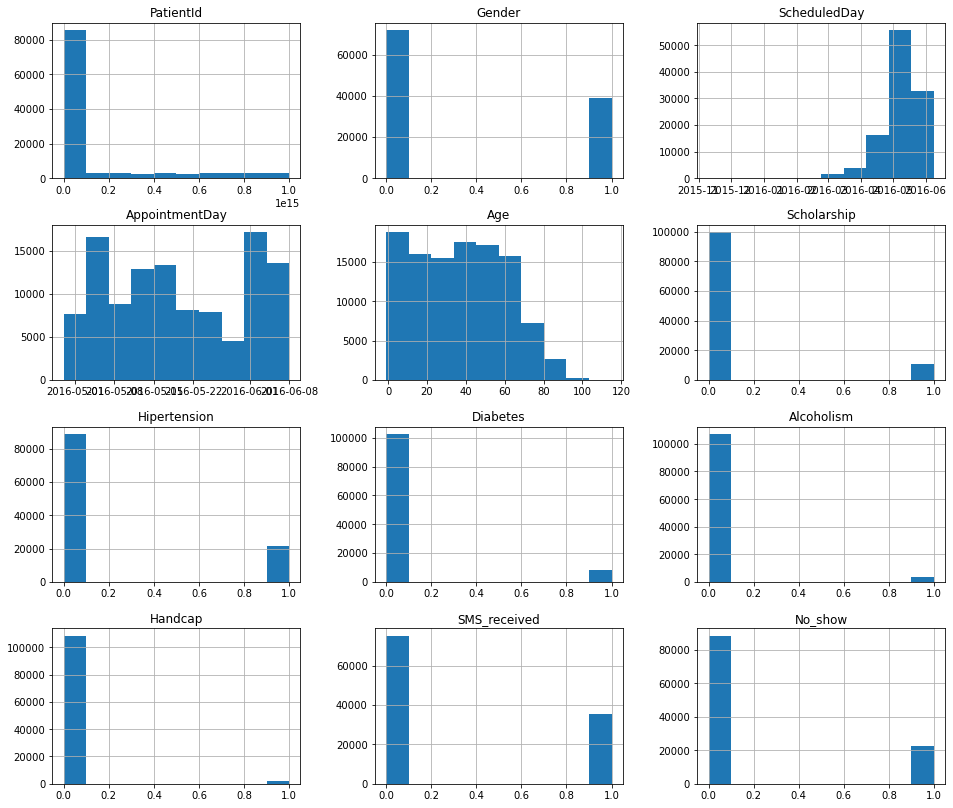

In [31]:
df.hist(figsize=(16,14));


### Data Cleaning Conclusion

>**1. The dataset datatypes have be regularized to suit it's corresponding data.**

>**2. There were no duplicates nor null values in the data.**
 
>**3. No_show values were changed to a binary type values of 0's and 1's**
 

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1:  What factors are important to know in order to predict if a patient will show up for their scheduled appointment?

Here , the question will be answered by drawing comparisons between 'Handicap' and 'No_show' to show that being handicapped is an important factor to predict no show.

The second comparison will be between 'Age' and 'no show'. Does Age play a significant role in no show appointments?

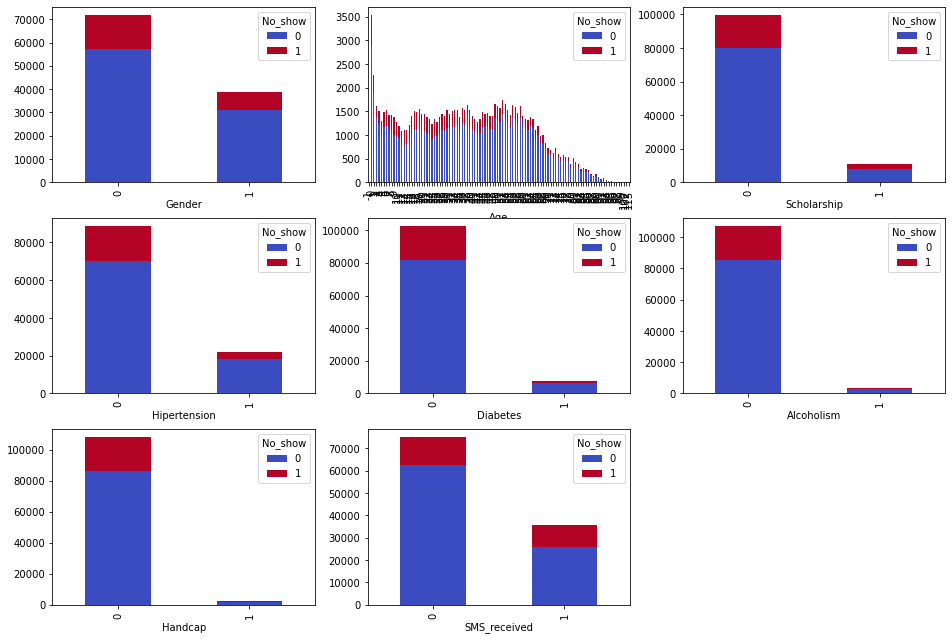

In [32]:
factors=['Gender','Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(factors):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'No_show'])[var].count().unstack('No_show').plot(ax=ax, kind='bar', stacked=True,cmap='coolwarm')

In [33]:
def groupHandshow(normalize=True):
    return df.groupby(['Handcap'])['No_show'].value_counts(normalize)


## custom function
**To groupby Gender then do a value_count with respect to No_show column. This accepts a parameter value for normalization

In [34]:
groupHandshow(False)

Handcap  No_show
0        0          86374
         1          21912
1        0           1834
         1            407
Name: No_show, dtype: int64

Text(0.5, 1.0, 'Number of Appointments by Handicap')

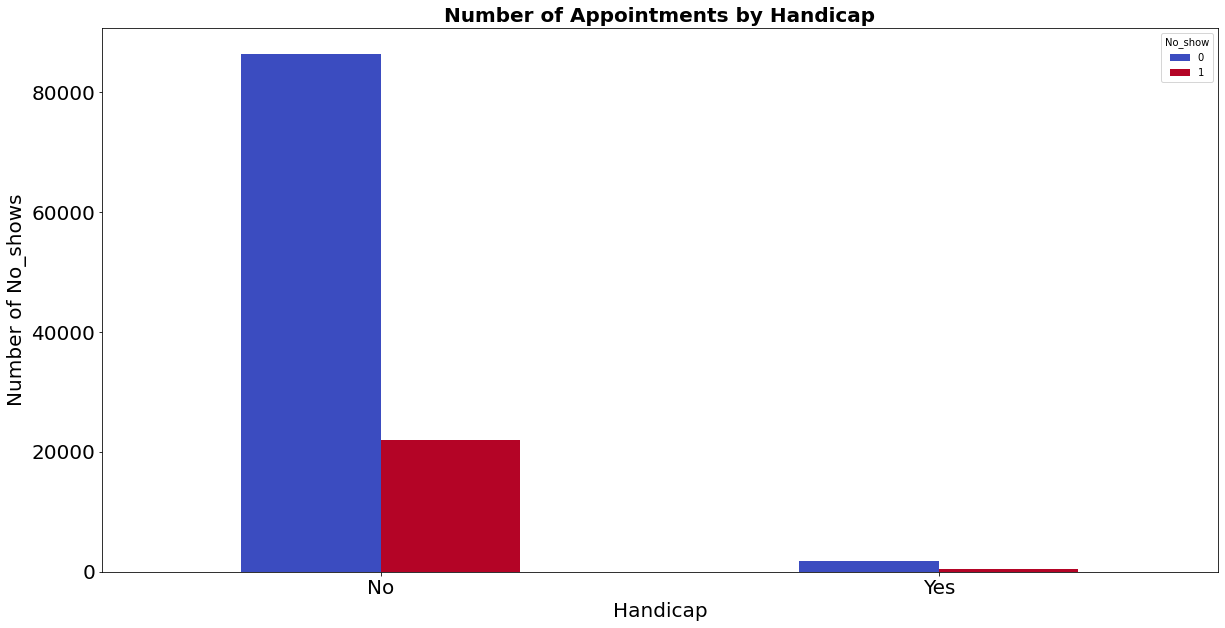

In [35]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
tcks = groupHandshow(False).unstack().index

handshow=groupHandshow(False).unstack().plot(kind='bar',cmap='coolwarm',figsize=(20,10),fontsize=20);

plt.xticks(tcks, ('No', 'Yes'), rotation ='horizontal');
handshow.set_xlabel('Handicap',fontsize=20);
plt.ylabel("Number of No_shows",fontsize=20);
plt.title('Number of Appointments by Handicap',fontsize=20,weight='bold')


This shows how being handicap is a factor for no show appointments.
This might be as a result of public buildings(in this case hospital) not being wheel-chair accessible or handicap patients not having caregivers 

Text(0.5, 1.0, 'Number of Appointments by Handicap')

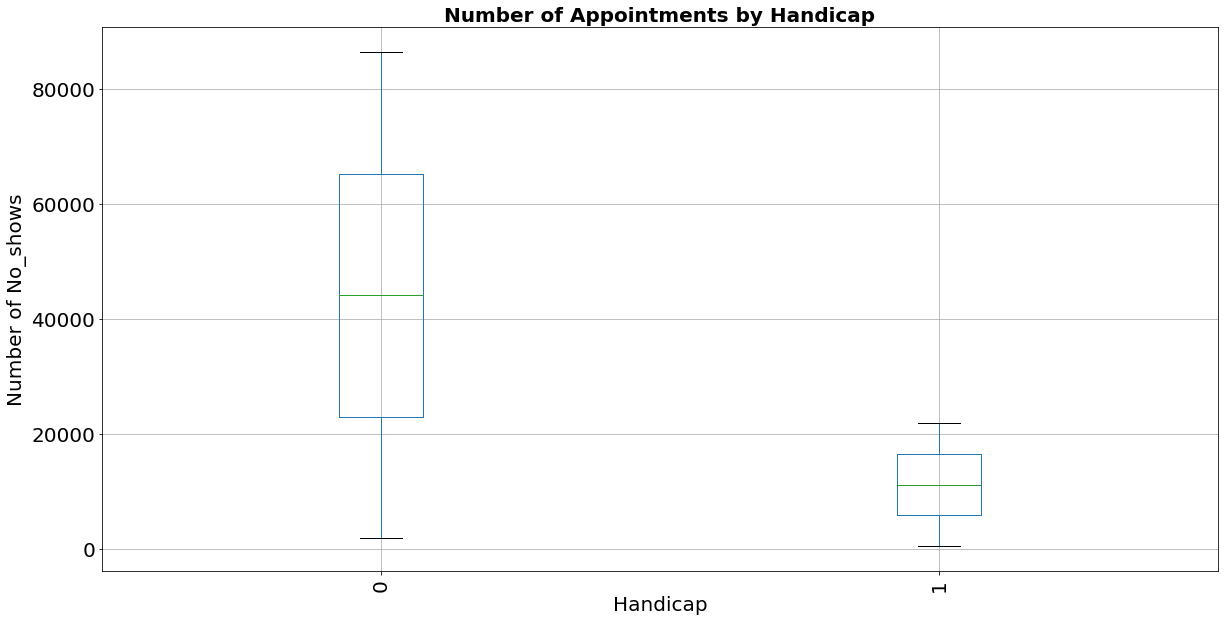

In [40]:
bxplt=groupHandshow(False).unstack().boxplot(rot=90,figsize=(20,10),fontsize=20)
bxplt.set_ylabel("Number of No_shows",fontsize=20)
bxplt.set_xlabel("Handicap",fontsize=20)
plt.title('Number of Appointments by Handicap',fontsize=20,weight='bold')

In [41]:
# Two useful masks to be used in further analysis
showed = df.No_show == 0
not_showed = df.No_show == 1

Text(0.5, 1.0, 'Number of Appointments by Age')

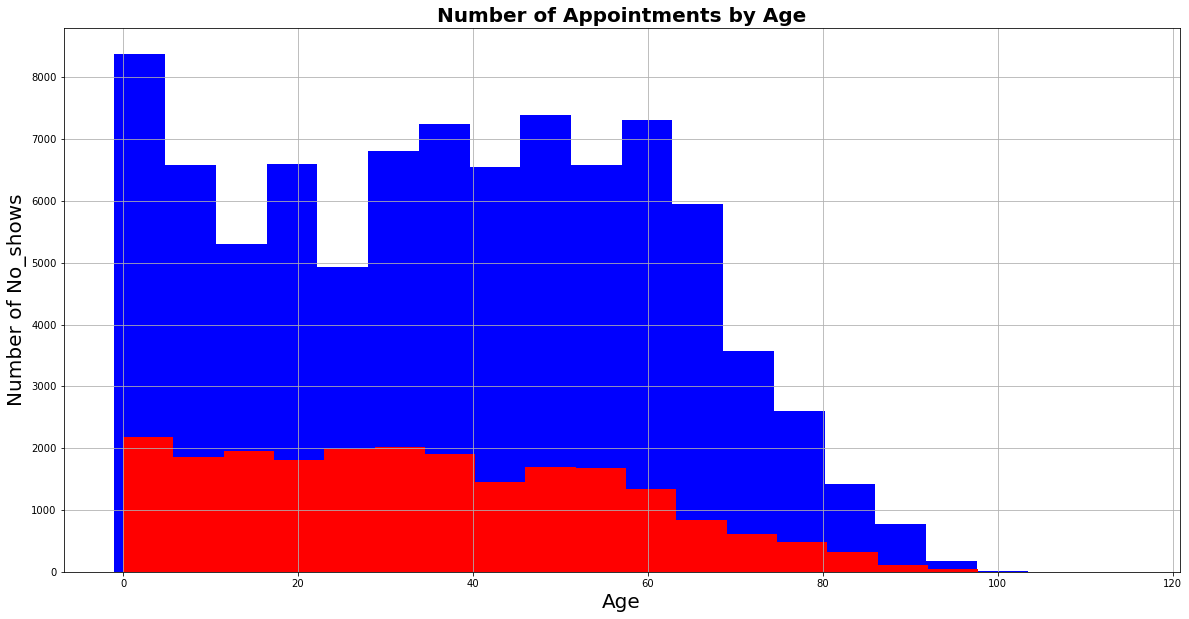

In [42]:
histpl=df.Age[showed].hist(alpha=1, bins=20,color = "Blue",figsize=(20,10));
histpl=df.Age[not_showed].hist(alpha=1, bins=20, color = "Red",figsize=(20,10));
histpl.set_ylabel("Number of No_shows",fontsize=20)
histpl.set_xlabel("Age",fontsize=20)
histpl.set_title('Number of Appointments by Age',fontsize=20,weight='bold')

The above plot shows that babies show up more than people of 55-80

### Research Question 2  (Does gender of a patient impact on the number of no-shows?)

In [43]:
df.groupby('Gender',axis=0).head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,95985133231274,0,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,0
11,7542951368435,1,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,1
13,911394617215919,1,2016-04-28 14:52:07+00:00,2016-04-29 00:00:00+00:00,28,NOVA PALESTINA,0,0,0,0,0,0,0
16,84574392942817,1,2016-04-28 08:51:47+00:00,2016-04-29 00:00:00+00:00,50,NOVA PALESTINA,0,0,0,0,0,0,0
22,863229818887631,1,2016-04-25 13:29:16+00:00,2016-04-29 00:00:00+00:00,13,CONQUISTA,0,0,0,0,0,1,1


In [44]:
df.Gender.value_counts()

0    71840
1    38687
Name: Gender, dtype: int64

There are more Females in the data set than Males . This can be as a result of population distribution or one gender having the tendecy of looking after their health

In [45]:
def groupGenshow(normalize=True):
    return df.groupby(['Gender'])['No_show'].value_counts(normalize)


### custom function
> **To groupby Gender then do a value_count with respect to No_show column.
This accepts a parameter value for normalization

In [46]:
groupGenshow(True).unstack()

No_show,0,1
Gender,,
0,0.796854,0.203146
1,0.800321,0.199679


The above returns the relative frequency by dividing all values by the sum of values. 
The difference in ratio .

In [47]:
groupGenshow(False)

Gender  No_show
0       0          57246
        1          14594
1       0          30962
        1           7725
Name: No_show, dtype: int64

Text(0.5, 1.0, 'Number of Appointments by Gender')

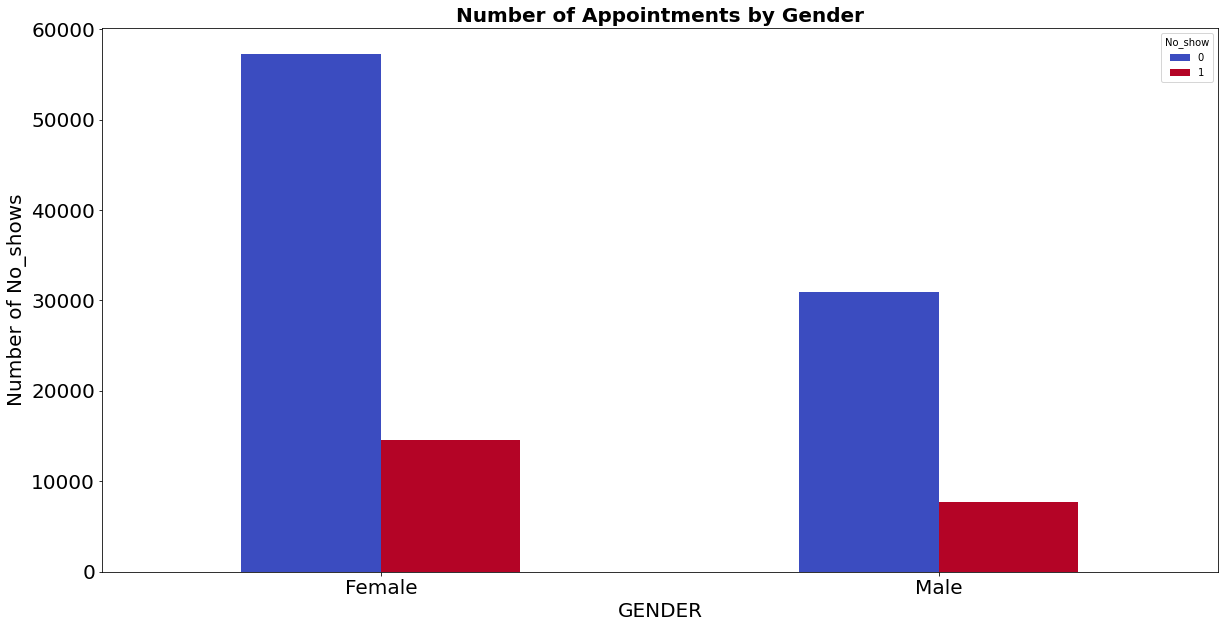

In [48]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
tcks = groupGenshow(False).unstack().index

gendshow=groupGenshow(False).unstack().plot(kind='bar',cmap='coolwarm',figsize=(20,10),fontsize=20);

plt.xticks(tcks, ('Female', 'Male'), rotation ='horizontal');
gendshow.set_xlabel('GENDER',fontsize=20);
plt.ylabel("Number of No_shows",fontsize=20);
plt.title('Number of Appointments by Gender',weight='bold',fontsize=20)

The above plot show the distribution of gender with respect to no show appointments

Text(0.5, 1.0, 'Number of Appointments by Gender')

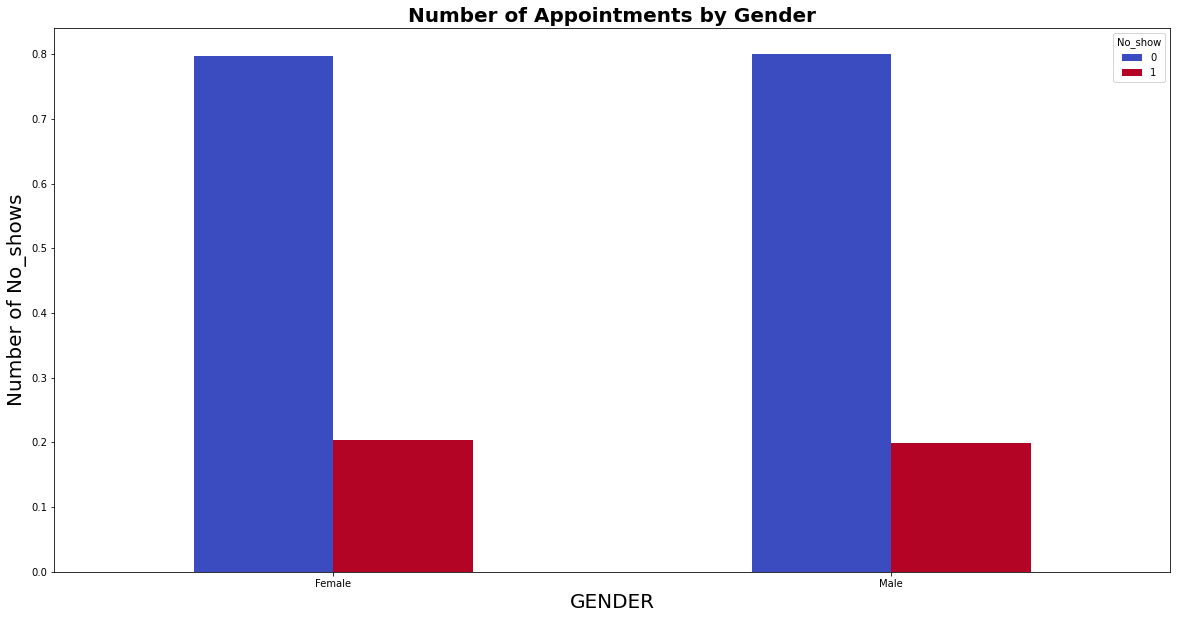

In [49]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
tcks = groupGenshow(True).unstack().index

gendshow=groupGenshow(True).unstack().plot(kind='bar',cmap='coolwarm',figsize=(20,10));

plt.xticks(tcks, ('Female', 'Male'), rotation ='horizontal');
gendshow.set_xlabel('GENDER',fontsize=20);
plt.ylabel("Number of No_shows",fontsize=20);
plt.title('Number of Appointments by Gender',weight='bold',fontsize=20)

The plot above shows that there is little or no difference in the ratio  of no shows across genders

<a id='conclusions'></a>
## Conclusions

> **Tip**: 
The dataset has been thoroghly looked at and analyzed. The No Show Appointment dataset had columns that needed to be tweaked in order to maintain consistency.
To do this, I renamed some columns,analzied the datatypes and changed datatypes like that of PatientID to Int, ScheduledDay to Datetime(ns UTC) etc. 

>  **Limitation**: The chosen dataset had lots of columns with values of zeroes and ones. This made it difficult to carry out further analysis

In [91]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files


255